In [3]:
!pip install opendatasets
!pip install pandas


In [4]:
import opendatasets as od
import pandas
od.download(
    "https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: arwaelsawy
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset


100%|██████████| 149M/149M [00:01<00:00, 107MB/s]


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define AlexNet architecture
def create_alexnet(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        layers.Conv2D(256, (5, 5), activation='relu'),
        layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        layers.Conv2D(384, (3, 3), activation='relu'),
        layers.Conv2D(384, (3, 3), activation='relu'),
        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dense(4096, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Load and preprocess the data
train_dir = '/content/brain-tumor-mri-dataset/Training'
test_dir = '/content/brain-tumor-mri-dataset/Testing'

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=128,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=128,
    class_mode='categorical')

# Define the model
input_shape = (224, 224, 3)  # Input shape of the images
num_classes = 4  # Number of classes in the Brain Tumor MRI Dataset
model = create_alexnet(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 128,
    validation_data=test_generator,
    validation_steps=test_generator.samples // 128,
    epochs=30)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Epoch 1/30
44/44 [==============================] - 31s 505ms/step - loss: 1.4297 - accuracy: 0.2776 - val_loss: 1.3745 - val_accuracy: 0.3070
Epoch 2/30
44/44 [==============================] - 19s 425ms/step - loss: 1.3351 - accuracy: 0.3198 - val_loss: 1.2581 - val_accuracy: 0.4008
Epoch 3/30
44/44 [==============================] - 18s 420ms/step - loss: 1.1485 - accuracy: 0.4667 - val_loss: 1.1393 - val_accuracy: 0.4805
Epoch 4/30
44/44 [==============================] - 19s 438ms/step - loss: 0.8979 - accuracy: 0.6322 - val_loss: 0.8379 - val_accuracy: 0.6672
Epoch 5/30
44/44 [==============================] - 18s 419ms/step - loss: 0.6693 - accuracy: 0.7572 - val_loss: 0.6886 - val_accuracy: 0.7180
Epoch 6/30
44/44 [==============================] - 21s 482ms/step - loss: 0.5078 - accuracy: 0.8184 - val_loss: 0.6711 - val_accuracy: 0.7391
Epoch 7/30
44/44 [==============================] - 19s 42

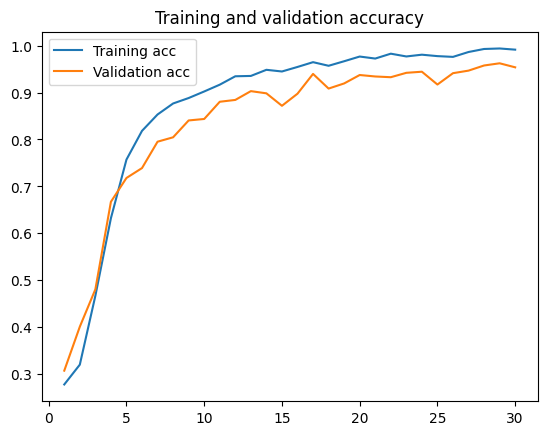

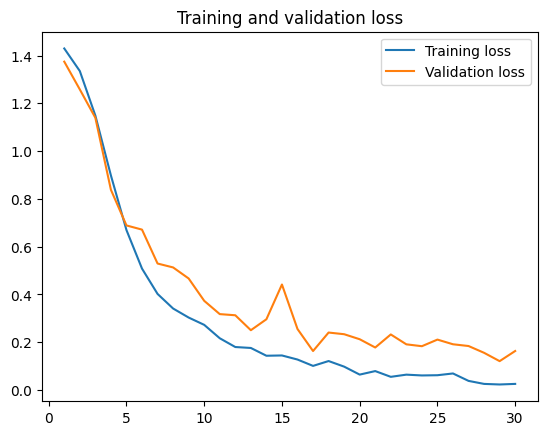

In [6]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()